# **Players Dataset Preprocessing**

In [1]:
import pandas as pd

In [2]:
players=pd.read_csv('atp_players.csv')

/tmp/ipython-input-3045706508.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  players=pd.read_csv('atp_players.csv')


In [3]:
players

,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
0,100001,Gardnar,Mulloy,R,19131122.0,USA,185.0,Q54544
1,100002,Pancho,Segura,R,19210620.0,ECU,168.0,Q54581
2,100003,Frank,Sedgman,R,19271002.0,AUS,180.0,Q962049
3,100004,Giuseppe,Merlo,R,19271011.0,ITA,NaN,Q1258752
4,100005,Richard,Gonzalez,R,19280509.0,USA,188.0,Q53554
...,...,...,...,...,...,...,...,...
65984,213700,Matvei,Kobiakov,U,NaN,RUS,NaN,NaN
65985,213701,Tobia Costanzo,Baragiola Mordini,U,NaN,ITA,NaN,NaN
65986,213702,Dominik,Wijntjes,U,NaN,NZL,NaN,NaN
65987,213703,Sam,Wensley,U,NaN,AUS,NaN,NaN


In [4]:
players=players.drop('wikidata_id', axis=1)

In [5]:
players=players.drop('dob', axis=1)

In [6]:
players

,player_id,name_first,name_last,hand,ioc,height
0,100001,Gardnar,Mulloy,R,USA,185.0
1,100002,Pancho,Segura,R,ECU,168.0
2,100003,Frank,Sedgman,R,AUS,180.0
3,100004,Giuseppe,Merlo,R,ITA,NaN
4,100005,Richard,Gonzalez,R,USA,188.0
...,...,...,...,...,...,...
65984,213700,Matvei,Kobiakov,U,RUS,NaN
65985,213701,Tobia Costanzo,Baragiola Mordini,U,ITA,NaN
65986,213702,Dominik,Wijntjes,U,NZL,NaN
65987,213703,Sam,Wensley,U,AUS,NaN


In [7]:
players.isnull().head()
players.isnull().sum()

,0
player_id,0
name_first,921
name_last,48
hand,16
ioc,670
height,61830


In [8]:
players=players.dropna(subset=['name_first'])

In [9]:
players=players.dropna(subset=['ioc'])

In [10]:
players.isnull().head()
players.isnull().sum()

,0
player_id,0
name_first,0
name_last,0
hand,10
ioc,0
height,60426


In [11]:
players

,player_id,name_first,name_last,hand,ioc,height
0,100001,Gardnar,Mulloy,R,USA,185.0
1,100002,Pancho,Segura,R,ECU,168.0
2,100003,Frank,Sedgman,R,AUS,180.0
3,100004,Giuseppe,Merlo,R,ITA,NaN
4,100005,Richard,Gonzalez,R,USA,188.0
...,...,...,...,...,...,...
65984,213700,Matvei,Kobiakov,U,RUS,NaN
65985,213701,Tobia Costanzo,Baragiola Mordini,U,ITA,NaN
65986,213702,Dominik,Wijntjes,U,NZL,NaN
65987,213703,Sam,Wensley,U,AUS,NaN


# **Current Ranking Preprocessing**

In [12]:
cranking=pd.read_csv('atp_rankings_current.csv')

In [13]:
cranking


,ranking_date,rank,player,points
0,20240101,1,104925,11245
1,20240101,2,207989,8855
2,20240101,3,106421,7600
3,20240101,4,206173,6490
4,20240101,5,126094,4805
...,...,...,...,...
92336,20241230,2156,210732,1
92337,20241230,2159,210575,1
92338,20241230,2160,212194,1
92339,20241230,2160,135939,1


# **Merging Datasets**

# Task
Merge the `players` DataFrame (which contains 'hand' information) with the `cranking` DataFrame (which contains 'points' and 'player' IDs) based on their common player identifiers, and then generate a box plot to visualize the distribution of 'points' for each 'hand' type. Finally, summarize the findings from the box plot, explaining the relationship between a player's dominant hand and their accumulated points, and highlight any significant observations or trends.

## Merge DataFrames

### Subtask:
Merge the `players` DataFrame (which contains 'hand' information) with the `cranking` DataFrame (which contains 'points' and 'player' IDs) based on their common player identifiers. This will create a combined DataFrame necessary for the analysis.


In [14]:
merged_data = pd.merge(cranking, players, left_on='player', right_on='player_id', how='left')
print("Merged DataFrame created successfully.")
print(merged_data.head())

Merged DataFrame created successfully.
   ranking_date  rank  player  points  player_id name_first name_last hand  \
0      20240101     1  104925   11245   104925.0      Novak  Djokovic    R   
1      20240101     2  207989    8855   207989.0     Carlos   Alcaraz    R   
2      20240101     3  106421    7600   106421.0     Daniil  Medvedev    R   
3      20240101     4  206173    6490   206173.0     Jannik    Sinner    R   
4      20240101     5  126094    4805   126094.0     Andrey    Rublev    R   

   ioc  height  
0  SRB   188.0  
1  ESP   183.0  
2  RUS   198.0  
3  ITA   191.0  
4  RUS   188.0  


**Reasoning**:
I need to merge the `cranking` DataFrame with the `players` DataFrame using a left merge operation, matching on 'player' from `cranking` and 'player_id' from `players`. The result will be stored in `merged_data`.



In [15]:
merged_data

,ranking_date,rank,player,points,player_id,name_first,name_last,hand,ioc,height
0,20240101,1,104925,11245,104925.0,Novak,Djokovic,R,SRB,188.0
1,20240101,2,207989,8855,207989.0,Carlos,Alcaraz,R,ESP,183.0
2,20240101,3,106421,7600,106421.0,Daniil,Medvedev,R,RUS,198.0
3,20240101,4,206173,6490,206173.0,Jannik,Sinner,R,ITA,191.0
4,20240101,5,126094,4805,126094.0,Andrey,Rublev,R,RUS,188.0
...,...,...,...,...,...,...,...,...,...,...
92336,20241230,2156,210732,1,210732.0,Miha,Vetrih,U,SLO,NaN
92337,20241230,2159,210575,1,210575.0,Jack,Karlsson Wistrand,U,SWE,NaN
92338,20241230,2160,212194,1,212194.0,Fabio,De Michele,R,ITA,180.0
92339,20241230,2160,135939,1,135939.0,Stefan,Kostic,U,AUS,NaN


# Task
Eliminate the 'player' column from the `merged_data` DataFrame

In [16]:
merged_data = merged_data.drop(columns=['player'])
merged_data.to_csv('merged_data.csv', index=False)
merged_data

,ranking_date,rank,points,player_id,name_first,name_last,hand,ioc,height
0,20240101,1,11245,104925.0,Novak,Djokovic,R,SRB,188.0
1,20240101,2,8855,207989.0,Carlos,Alcaraz,R,ESP,183.0
2,20240101,3,7600,106421.0,Daniil,Medvedev,R,RUS,198.0
3,20240101,4,6490,206173.0,Jannik,Sinner,R,ITA,191.0
4,20240101,5,4805,126094.0,Andrey,Rublev,R,RUS,188.0
...,...,...,...,...,...,...,...,...,...
92336,20241230,2156,1,210732.0,Miha,Vetrih,U,SLO,NaN
92337,20241230,2159,1,210575.0,Jack,Karlsson Wistrand,U,SWE,NaN
92338,20241230,2160,1,212194.0,Fabio,De Michele,R,ITA,180.0
92339,20241230,2160,1,135939.0,Stefan,Kostic,U,AUS,NaN


## **Ranking_20s**

In [17]:
ranking_20s = pd.read_csv('atp_rankings_20s.csv')
print("ATP Rankings 2020s dataset loaded successfully.")
ranking_20s.head()
merged_data20s = pd.merge(ranking_20s, players, left_on='player', right_on='player_id', how='left')
print("Merged DataFrame created successfully.")
merged_data20s.head()
merged_data20s = merged_data20s.drop(columns=['player'])
display(merged_data20s.head())
merged_data20s.to_csv('merged_data20s.csv', index=False)

ATP Rankings 2020s dataset loaded successfully.
Merged DataFrame created successfully.


,ranking_date,rank,points,player_id,name_first,name_last,hand,ioc,height
0,20200106,1,9985,104745,Rafael,Nadal,L,ESP,185.0
1,20200106,2,9055,104925,Novak,Djokovic,R,SRB,188.0
2,20200106,3,6590,103819,Roger,Federer,R,SUI,185.0
3,20200106,4,5825,106233,Dominic,Thiem,R,AUT,185.0
4,20200106,5,5705,106421,Daniil,Medvedev,R,RUS,198.0


## **Ranking_10s**

In [18]:
ranking_10s = pd.read_csv('atp_rankings_10s.csv')
print("ATP Rankings 2010s dataset loaded successfully.")
ranking_10s.head()
merged_data10s = pd.merge(ranking_10s, players, left_on='player', right_on='player_id', how='left')
print("Merged DataFrame created successfully.")
merged_data10s.head()
merged_data10s = merged_data10s.drop(columns=['player'])
display(merged_data10s.head())
merged_data10s.to_csv('merged_data10s.csv', index=False)

ATP Rankings 2010s dataset loaded successfully.
Merged DataFrame created successfully.


,ranking_date,rank,points,player_id,name_first,name_last,hand,ioc,height
0,20100104,1,10550.0,103819,Roger,Federer,R,SUI,185.0
1,20100104,2,9205.0,104745,Rafael,Nadal,L,ESP,185.0
2,20100104,3,8310.0,104925,Novak,Djokovic,R,SRB,188.0
3,20100104,4,7030.0,104918,Andy,Murray,R,GBR,191.0
4,20100104,5,6785.0,105223,Juan Martin,del Potro,R,ARG,198.0


## **Ranking_00s**

In [19]:
ranking_00s = pd.read_csv('atp_rankings_00s.csv')
print("ATP Rankings 2000s dataset loaded successfully.")
ranking_00s.head()
merged_data00s = pd.merge(ranking_00s, players, left_on='player', right_on='player_id', how='left')
print("Merged DataFrame created successfully.")
merged_data00s.head()
merged_data00s = merged_data00s.drop(columns=['player'])
display(merged_data00s.head())
merged_data00s.to_csv('merged_data00s.csv', index=False)

ATP Rankings 2000s dataset loaded successfully.
Merged DataFrame created successfully.


,ranking_date,rank,points,player_id,name_first,name_last,hand,ioc,height
0,20000110,1,4135.0,101736,Andre,Agassi,R,USA,180.0
1,20000110,2,2915.0,102338,Yevgeny,Kafelnikov,R,RUS,190.0
2,20000110,3,2419.0,101948,Pete,Sampras,R,USA,185.0
3,20000110,4,2184.0,103017,Nicolas,Kiefer,R,GER,183.0
4,20000110,5,2169.0,102856,Gustavo,Kuerten,R,BRA,190.0


## **Ranking_90s**

In [20]:
ranking_90s = pd.read_csv('atp_rankings_90s.csv')
print("ATP Rankings 1900s dataset loaded successfully.")
ranking_90s.head()
merged_data90s = pd.merge(ranking_90s, players, left_on='player', right_on='player_id', how='left')
print("Merged DataFrame created successfully.")
merged_data90s.head()
merged_data90s = merged_data90s.drop(columns=['player'])
display(merged_data90s.head())
merged_data90s.to_csv('merged_data90s.csv', index=False)

ATP Rankings 1900s dataset loaded successfully.
Merged DataFrame created successfully.


,ranking_date,rank,points,player_id,name_first,name_last,hand,ioc,height
0,19900101,1,2913.0,100656.0,Ivan,Lendl,R,USA,188.0
1,19900101,2,2279.0,101414.0,Boris,Becker,R,GER,190.0
2,19900101,3,2111.0,101222.0,Stefan,Edberg,R,SWE,188.0
3,19900101,4,1398.0,100763.0,Brad,Gilbert,R,USA,185.0
4,19900101,5,1354.0,100581.0,John,McEnroe,L,USA,180.0


## **Ranking_80s**

In [21]:
ranking_80s = pd.read_csv('atp_rankings_80s.csv')
print("ATP Rankings 1800s dataset loaded successfully.")
ranking_80s.head()
merged_data80s = pd.merge(ranking_80s, players, left_on='player', right_on='player_id', how='left')
print("Merged DataFrame created successfully.")
merged_data80s.head()
merged_data80s = merged_data80s.drop(columns=['player'])
display(merged_data80s.head())
merged_data80s.to_csv('merged_data80s.csv', index=False)

ATP Rankings 1800s dataset loaded successfully.
Merged DataFrame created successfully.


,ranking_date,rank,points,player_id,name_first,name_last,hand,ioc,height
0,19801222,1,NaN,100437.0,Bjorn,Borg,R,SWE,180.0
1,19801222,2,NaN,100581.0,John,McEnroe,L,USA,180.0
2,19801222,3,NaN,100284.0,Jimmy,Connors,L,USA,178.0
3,19801222,4,NaN,100282.0,Guillermo,Vilas,L,ARG,180.0
4,19801222,5,NaN,100428.0,Gene,Mayer,R,USA,183.0


## **Ranking_70s**

In [22]:
ranking_70s = pd.read_csv('atp_rankings_70s.csv')
print("ATP Rankings 1700s dataset loaded successfully.")
ranking_70s.head()
merged_data70s = pd.merge(ranking_70s, players, left_on='player', right_on='player_id', how='left')
print("Merged DataFrame created successfully.")
merged_data70s.head()
merged_data70s = merged_data70s.drop(columns=['player'])
display(merged_data70s.head())
merged_data70s.to_csv('merged_data70s.csv', index=False)

ATP Rankings 1700s dataset loaded successfully.
Merged DataFrame created successfully.


,ranking_date,rank,points,player_id,name_first,name_last,hand,ioc,height
0,19730827,129,NaN,100005,Richard,Gonzalez,R,USA,188.0
1,19730827,114,NaN,100011,Torben,Ulrich,L,DEN,180.0
2,19730827,6,NaN,100016,Ken,Rosewall,R,AUS,175.0
3,19730827,19,NaN,100022,Roy,Emerson,R,AUS,183.0
4,19730827,82,NaN,100025,Barry,Phillips Moore,R,AUS,173.0


# **Relationship between Points and Rank**

# Task
Plot a scatter plot to visualize the relationship between 'rank' and 'points' from the `cranking` DataFrame, and explain the insights gained from the plot.

## Plot Scatter Plot

### Subtask:
Generate a scatter plot to visualize the relationship between 'rank' and 'points' from the `cranking` DataFrame.


**Reasoning**:
The user wants to visualize the relationship between 'rank' and 'points' using a scatter plot. I will import `matplotlib.pyplot`, create the scatter plot with appropriate labels and title, and then display it.



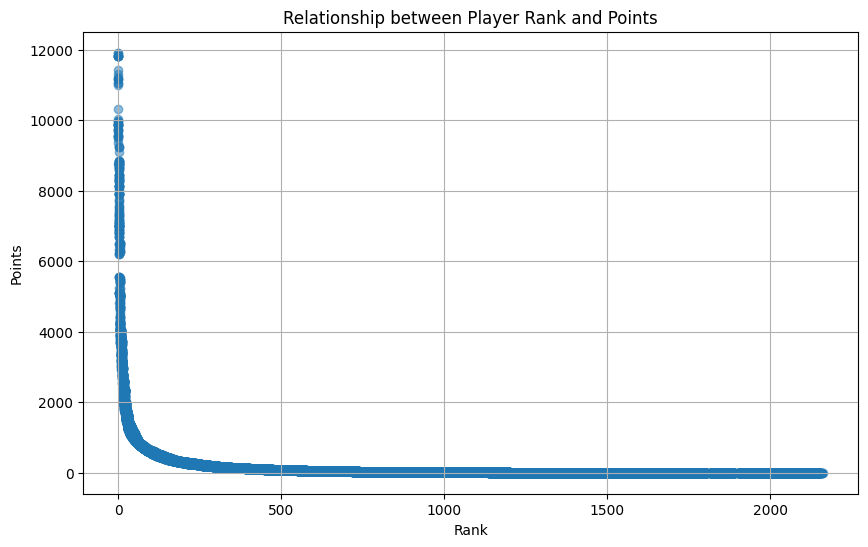

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(cranking['rank'], cranking['points'], alpha=0.5)
plt.xlabel('Rank')
plt.ylabel('Points')
plt.title('Relationship between Player Rank and Points')
plt.grid(True)
plt.show()

The scatter plot visualizes the relationship between a player's rank and their points.

**Insights from the plot:**

1.  **Inverse Relationship**: There is a clear inverse relationship between rank and points. As the rank increases (meaning a lower position), the points decrease significantly.
2.  **Concentration at Higher Ranks**: Players with higher ranks (closer to 1) have a much wider range and higher number of points. The very top-ranked players accumulate a substantial amount of points.
3.  **Rapid Drop-off**: There is a very steep drop-off in points as the rank increases from the top. This indicates that the difference in points between top-ranked players is much larger than between lower-ranked players.
4.  **Long Tail**: A large number of players have very few points, especially as the rank goes higher. The plot shows a long 'tail' of players with 0 or very few points across a broad range of ranks.

## Explain Plot

### Subtask:
Explain the insights gained from the scatter plot regarding the relationship between rank and points.


## Summary:

### Q&A
The relationship between player rank and points shows a clear inverse correlation: as rank increases (indicating a lower position), points decrease significantly.

### Data Analysis Key Findings
*   There is a clear inverse relationship between rank and points: as rank increases, points decrease substantially.
*   Players with higher ranks (closer to 1) accumulate a much wider range and higher number of points.
*   A rapid drop-off in points occurs as the rank increases from the top positions, indicating larger point differences among top-ranked players than among lower-ranked players.
*   The plot reveals a "long tail" where many players have very few points across a broad range of higher ranks.

### Insights or Next Steps
*   The data suggests a highly competitive scoring system where a small difference in rank at the top translates to a large difference in points, while at lower ranks, many players cluster with very few points.
*   Further analysis could involve categorizing players by point thresholds or rank tiers to understand population distribution and competitive balance more deeply.


# **Box-plot**

## Plot Box Plot for Points by Hand Type

### Subtask:
Generate a box plot to visualize the distribution of 'points' for each 'hand' type from the `merged_data` DataFrame.

**Reasoning**:
To visualize the distribution of 'points' for each 'hand' type, I will create a box plot. I need to make sure to handle potential missing values in the 'hand' column before plotting.



Unique values in 'hand' column before dropping NaNs: ['R' 'L' 'U' 'A' nan]


<Figure size 1000x600 with 0 Axes>

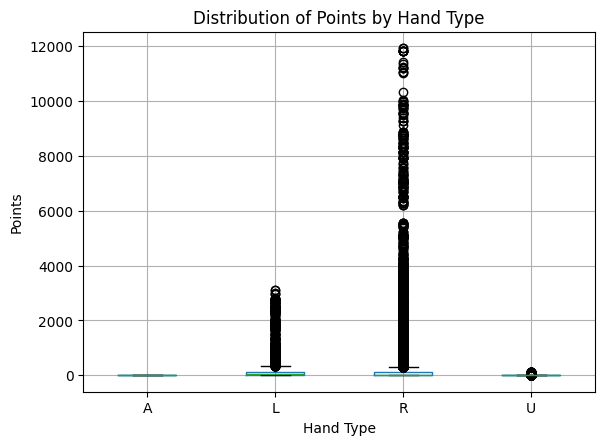

In [24]:
import matplotlib.pyplot as plt

# Drop rows where 'hand' is NaN, as these cannot be categorized for the box plot
# and will cause an error or be silently dropped depending on the plotting library.
# However, it's generally better to explicitly handle NaNs.
# Let's inspect unique values in 'hand' first.
print("Unique values in 'hand' column before dropping NaNs:", merged_data['hand'].unique())

# Filter out NaN values from the 'hand' column for plotting
plot_data = merged_data.dropna(subset=['hand'])

plt.figure(figsize=(10, 6))
plot_data.boxplot(column='points', by='hand', grid=False)
plt.title('Distribution of Points by Hand Type')
plt.xlabel('Hand Type')
plt.ylabel('Points')
plt.suptitle('') # Suppress the default title generated by pandas boxplot 'Boxplot of points by hand'
plt.grid(True)
plt.show()


## Explain Box Plot for Points by Hand Type

### Subtask:
Explain the findings from the box plot, detailing the relationship between a player's dominant hand and their accumulated points, and highlight any significant observations or trends.

**Insights from the box plot:**

1.  **Dominance of Right-Handed Players (R)**: The 'R' hand type category shows significantly higher points than all other categories. It has the highest median, the largest interquartile range (IQR), and the highest maximum point values, indicating that top-performing players are predominantly right-handed.
2.  **Left-Handed Players (L) Performance**: Left-handed players also accumulate substantial points, with their distribution being the second highest. However, the median and overall range of points for left-handed players are considerably lower than those for right-handed players.
3.  **Unidentified (U) and Ambidextrous (A) Players**: The 'U' (Unidentified) and 'A' (Ambidextrous) categories show very low point distributions. The box plots for these categories are extremely compressed, with medians very close to zero and a minimal range of points. This could suggest that these categories either contain players with generally lower performance or are populated by entries where hand information is missing or incorrectly categorized for competitive players.
4.  **Outliers**: All categories, especially 'R' and 'L', exhibit numerous outliers, indicating that a few players in each hand type achieve significantly higher points than the majority within their group. These outliers are particularly prominent in the 'R' category, stretching up to the maximum observed points.
5.  **Variability**: Right-handed players show the greatest variability in points, followed by left-handed players. The 'U' and 'A' categories show very little variability.

**Summary:**
The box plot clearly illustrates a strong correlation between being right-handed and achieving higher points in the `cranking` dataset. While left-handed players also perform well, their overall point distribution is lower than that of right-handed players. The 'Unidentified' and 'Ambidextrous' categories have negligible impact on high point totals.

## Final Task

### Subtask:
Summarize the findings from the box plot, explaining the relationship between a player's dominant hand and their accumulated points, and highlight any significant observations or trends.


## Summary:

### Q&A
The box plot reveals a strong relationship between a player's dominant hand and their accumulated points. Right-handed players (R) exhibit significantly higher points, characterized by the highest median, largest interquartile range, and greatest maximum point values, indicating that top performers are predominantly right-handed. Left-handed players (L) also accumulate substantial points, ranking second, though their median and overall point range are considerably lower than right-handed players. Unidentified (U) and Ambidextrous (A) players show very low point distributions, with compressed box plots and medians close to zero, suggesting either lower performance within these groups or issues with data categorization. All categories, particularly 'R' and 'L', contain outliers, demonstrating that some players achieve significantly higher points than their peers within the same hand type.

### Data Analysis Key Findings
*   **Dominance of Right-Handed Players (R)**: Right-handed players consistently achieve significantly higher points, showcasing the highest median, largest interquartile range, and maximum point values among all categories.
*   **Performance of Left-Handed Players (L)**: Left-handed players accumulate the second-highest points, but their overall distribution, including the median and range, is notably lower compared to right-handed players.
*   **Low Performance in Unidentified (U) and Ambidextrous (A) Categories**: Players categorized as 'U' or 'A' demonstrate very low point distributions, with compressed box plots and medians near zero, indicating either consistently lower performance or potential data quality issues regarding hand classification.
*   **Presence of Outliers**: All hand categories, especially 'R' and 'L', exhibit numerous outliers, signifying that a few players within each group achieve exceptionally high points compared to the majority.
*   **Variability in Points**: Right-handed players display the greatest variability in accumulated points, followed by left-handed players, while 'U' and 'A' categories show minimal variability.

### Insights or Next Steps
*   Investigate the 'U' (Unidentified) and 'A' (Ambidextrous) categories further to determine if the low point totals are due to actual player performance or data entry inconsistencies, which could impact comprehensive player analysis.
*   Explore potential factors contributing to the higher point accumulation and greater variability among right-handed players, such as training methodologies, equipment design, or prevalence in competitive play.
